In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ["svg"]

import mne
from mne import io
from mne.stats import permutation_cluster_test
from mne.datasets import sample

import warnings
warnings.filterwarnings("ignore") 

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
tmin = -0.2
tmax = 0.5

#   Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

channel = 'MEG 1332'  # include only this channel in analysis
include = [channel]

Opening raw data file /home/haiyanwu/mne_data/MNE-sample-data//MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [3]:
picks = mne.pick_types(raw.info, meg=False, eog=True, include=include,
                       exclude='bads')
event_id = 1
reject = dict(grad=4000e-13, eog=150e-6)
epochs1 = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                     baseline=(None, 0), reject=reject)
condition1 = epochs1.get_data()  # as 3D matrix

event_id = 2
epochs2 = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                     baseline=(None, 0), reject=reject)
condition2 = epochs2.get_data()  # as 3D matrix

condition1 = condition1[:, 0, :]  # take only one channel to get a 2D array
condition2 = condition2[:, 0, :]  # take only one channel to get a 2D array

Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
4 projection items activated
Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 

In [4]:
threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = \
    permutation_cluster_test([condition1, condition2], n_permutations=1000,
                             threshold=threshold, tail=1, n_jobs=1,
                             out_type='mask')

stat_fun(H1): min=0.000227 max=38.167093
Running initial clustering
Found 4 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


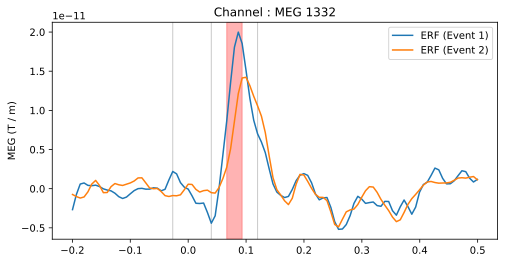

<Figure size 432x288 with 0 Axes>

In [10]:
times = epochs1.times
plt.close('all')
plt.figure(figsize=(8, 4))
plt.title('Channel : ' + channel)
plt.plot(times, condition1.mean(axis=0),
         label="ERF (Event 1)")
plt.plot(times, condition2.mean(axis=0),
         label="ERF (Event 2)")
plt.ylabel("MEG (T / m)")
for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = plt.axvspan(times[c.start], times[c.stop - 1],
                        color='r', alpha=0.3)
    else:
        plt.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3),
                    alpha=0.3)
plt.legend()
plt.show()
plt.tight_layout()

In [33]:
import os
import numpy as np
import pandas as pd
with open(os.path.join("../data/exp_log.txt"), "r") as f:
    texts = f.readlines()

In [2]:
task = None
exclude_sub = [1, 5, 19, 28]
info_dict = {col: [] for col in ["task", "sub", "bad_ori", "bad_final", "comp_ori", "comp_final", "trials_ori", "trials_final"]}
for text in texts:
    if text == "\n" or len(text.split(",")) > 4:
        continue
    if len(text.split(" ")) == 3:
        task = text.split(" ")[1]
    else:
        split_text = text.strip().replace(" ", "").split(",")
        if int(split_text[0].split("-")[1]) in exclude_sub:
            continue
        # task
        info_dict["task"].append(task)
        # sub
        info_dict["sub"].append(split_text[0])
        # bad channels
        info_dict["bad_ori"].append(int(split_text[1].split(":")[1].split("/")[1]))
        info_dict["bad_final"].append(int(split_text[1].split(":")[1].split("/")[0]))
        # components
        info_dict["comp_ori"].append(int(split_text[2].split(":")[1].split("/")[1]))
        info_dict["comp_final"].append(int(split_text[2].split(":")[1].split("/")[0]))
        # trials
        info_dict["trials_ori"].append(int(split_text[3].split(":")[1].split("/")[1]))
        info_dict["trials_final"].append(int(split_text[3].split(":")[1].split("/")[0]))

In [30]:
info = pd.DataFrame(info_dict)
info

,task,sub,bad_ori,bad_final,comp_ori,comp_final,trials_ori,trials_final
0,foodchoice,sub-02,100,96,96,92,320,305
1,foodchoice,sub-03,100,97,97,95,320,304
2,foodchoice,sub-04,100,96,96,88,320,282
3,foodchoice,sub-06,100,99,99,92,320,253
4,foodchoice,sub-07,100,100,100,96,320,299
...,...,...,...,...,...,...,...,...
76,imagechoice,sub-26,100,97,97,95,317,289
77,imagechoice,sub-27,100,94,94,92,312,279
78,imagechoice,sub-29,100,98,98,94,313,293
79,imagechoice,sub-30,100,93,93,89,295,277


In [49]:
info["Bad channels"] = info["bad_ori"] - info["bad_final"]
info["Removed components"] = info["comp_ori"] - info["comp_final"]
info["Bad epochs"] = info["trials_ori"] - info["trials_final"]
info["Bad channels (%)"] = np.round(100 * (info["Bad channels"] / info["bad_ori"]), decimals=1)
info["Removed components (%)"] = np.round(100 * (info["Removed components"] / info["comp_ori"]), decimals=1)
info["Bad epochs (%)"] = np.round(100 * (info["Bad epochs"] / info["trials_ori"]), decimals=1)

In [56]:
print(info[info["task"] == "foodchoice"][["bad_ori", "comp_ori", "trials_ori"]].mean())
food_perc = info[info["task"] == "foodchoice"][["sub", "Bad channels (%)", "Removed components (%)", "Bad epochs (%)"]]
print(f"mean: {food_perc.iloc[:, 1:].mean()}")
print(f"std: {food_perc.iloc[:, 1:].std()}")
food_perc.to_csv("../data/foodchoice.csv", index=False)

bad_ori       100.000000
comp_ori       98.037037
trials_ori    320.000000
dtype: float64
mean: Bad channels (%)          1.962963
Removed components (%)    3.851852
Bad epochs (%)            7.755556
dtype: float64
std: Bad channels (%)          1.285466
Removed components (%)    1.796229
Bad epochs (%)            4.426696
dtype: float64


In [57]:
print(info[info["task"] == "wordchoice"][["bad_ori", "comp_ori", "trials_ori"]].mean())
word_perc = info[info["task"] == "wordchoice"][["sub", "Bad channels (%)", "Removed components (%)", "Bad epochs (%)"]]
print(f"mean: {word_perc.iloc[:, 1:].mean()}")
print(f"std: {word_perc.iloc[:, 1:].std()}")
word_perc.to_csv("../data/wordchoice.csv", index=False)

bad_ori       100.000000
comp_ori       97.444444
trials_ori    309.925926
dtype: float64
mean: Bad channels (%)          2.555556
Removed components (%)    3.070370
Bad epochs (%)            8.492593
dtype: float64
std: Bad channels (%)          1.761410
Removed components (%)    1.489402
Bad epochs (%)            4.206399
dtype: float64


In [58]:
print(info[info["task"] == "imagechoice"][["bad_ori", "comp_ori", "trials_ori"]].mean())
image_perc = info[info["task"] == "imagechoice"][["sub", "Bad channels (%)", "Removed components (%)", "Bad epochs (%)"]]
print(f"mean: {image_perc.iloc[:, 1:].mean()}")
print(f"std: {image_perc.iloc[:, 1:].std()}")
image_perc.to_csv("../data/imagechoice.csv", index=False)

bad_ori       100.000000
comp_ori       97.259259
trials_ori    310.629630
dtype: float64
mean: Bad channels (%)           2.740741
Removed components (%)     3.307407
Bad epochs (%)            10.018519
dtype: float64
std: Bad channels (%)          1.852080
Removed components (%)    1.030282
Bad epochs (%)            5.615640
dtype: float64


In [5]:
import os
import shutil

In [6]:
for sub in range(1, 32):
    sub = f"sub-{str(sub).zfill(2)}"
    resting_set = f"{sub}_task-resting_eeg.set"
    shutil.copyfile(f"../data/EGI_REST/{resting_set}", f"../data/EGI_TASK/{resting_set}")

FileNotFoundError: [Errno 2] No such file or directory: '../data/EGI_REST/sub-01_task-resting_eeg.set'

In [2]:
os.listdir(os.path.join("../data/EGI_REST"))

['sub-15_task-rest_eeg.set',
 'sub-01_task-rest_eeg.set',
 'sub-02_task-rest_eeg.set',
 'sub-03_task-rest_eeg.set',
 'sub-04_task-rest_eeg.set',
 'sub-05_task-rest_eeg.set',
 'sub-06_task-rest_eeg.set',
 'sub-07_task-rest_eeg.set',
 'sub-08_task-rest_eeg.set',
 'sub-09_task-rest_eeg.set',
 'sub-10_task-rest_eeg.set',
 'sub-11_task-rest_eeg.set',
 'sub-12_task-rest_eeg.set',
 'sub-13_task-rest_eeg.set',
 'sub-14_task-rest_eeg.set',
 'sub-16_task-rest_eeg.set',
 'sub-17_task-rest_eeg.set',
 'sub-18_task-rest_eeg.set',
 'sub-19_task-rest_eeg.set',
 'sub-20_task-rest_eeg.set',
 'sub-21_task-rest_eeg.set',
 'sub-22_task-rest_eeg.set',
 'sub-23_task-rest_eeg.set',
 'sub-24_task-rest_eeg.set',
 'sub-25_task-rest_eeg.set',
 'sub-26_task-rest_eeg.set',
 'sub-27_task-rest_eeg.set',
 'sub-28_task-rest_eeg.set',
 'sub-29_task-rest_eeg.set',
 'sub-30_task-rest_eeg.set',
 'sub-31_task-rest_eeg.set']